In [1]:
# Importing libraries

# for data reading and wrangling
import pandas as pd
import numpy as np

# for statistical evaluation

from scipy.stats import mode

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for machine leaning
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
import pandas as pd
data = pd.read_csv("E:/Data Science/Datasets/houses_to_rent_v2.csv")
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [3]:
# getting the statistics of the dataset

data.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [4]:
# getting the info of the dataset

data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


   * No Null/Nan/Missing values present

In [5]:
# getting the top 5 rows of the dataset

data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


# Data Visualization :: 

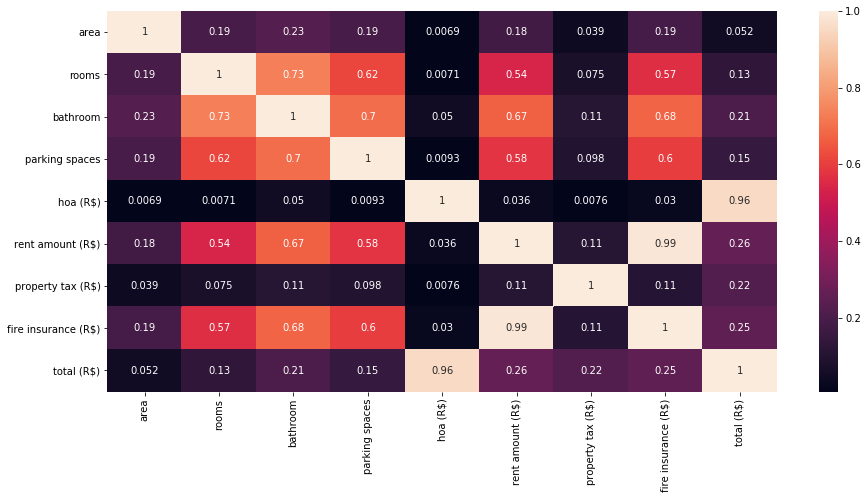

In [6]:
# Plotting heatmap to see the correlation between the variables

plt.figure(figsize = (15, 7))
sns.heatmap(data.corr(), annot = True)

# Count- Plot ::

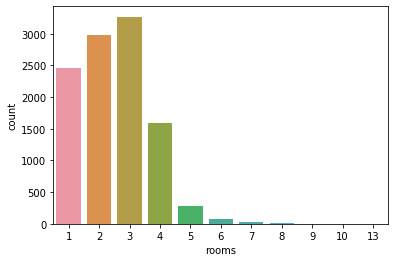

In [7]:
sns.countplot(data['rooms'])

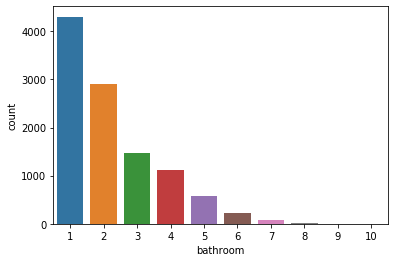

In [8]:
sns.countplot(data['bathroom'])

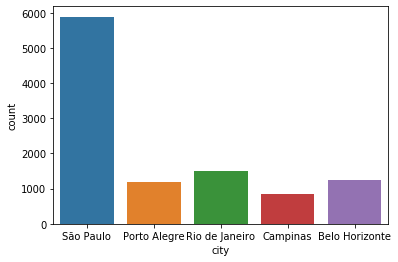

In [9]:
sns.countplot(data['city'])

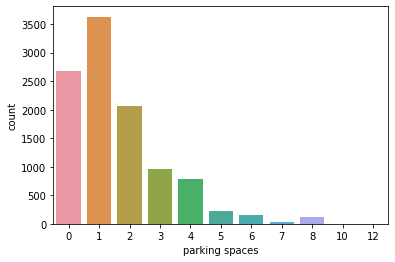

In [10]:
sns.countplot(data['parking spaces'])

In [11]:
# Creating pivot table to better visulize the data

pivot_table1 = data.pivot_table(values = ['rent amount (R$)'], index = ['parking spaces','animal','furniture'])
pivot_table1

rent amount (R$)
parking spaces animal    furniture                      
0              acept     furnished           2899.392252
                         not furnished       2058.497275
               not acept furnished           2784.492386
                         not furnished       1613.295868
1              acept     furnished           3569.471601
                         not furnished       2296.828375
               not acept furnished           3422.306011
                         not furnished       2214.218876
2              acept     furnished           5719.597884
                         not furnished       4072.066365
               not acept furnished           6645.235849
                         not furnished       4235.696154
3              acept     furnished           6926.762791
                         not furnished       6102.557627
               not acept furnished           8962.095238
                         not furnished       6272.719008
4              acept     furnished           9230.314815
                         not furnished       7297.280943
               not acept furnished           9877.083333
                         not furnished       7128.574468
5              acept     furnished           9935.122449
                         not furnished       7789.489655
               not acept furnished           9242.500000
                         not furnished       7633.214286
6              acept     furnished           9862.400000
                         not furnished       8735.683333
               not acept furnished           7493.333333
                         not furnished       7882.500000
7              acept     furnished           9693.000000
                         not furnished       9314.736842
               not acept not furnished       9785.000000
8              acept     furnished           9588.095238
                         not furnished       8635.673913
               not acept furnished           9000.000000
                         not furnished       7311.111111
10             acept     not furnished       8950.000000
12             acept     not furnished       6900.000000

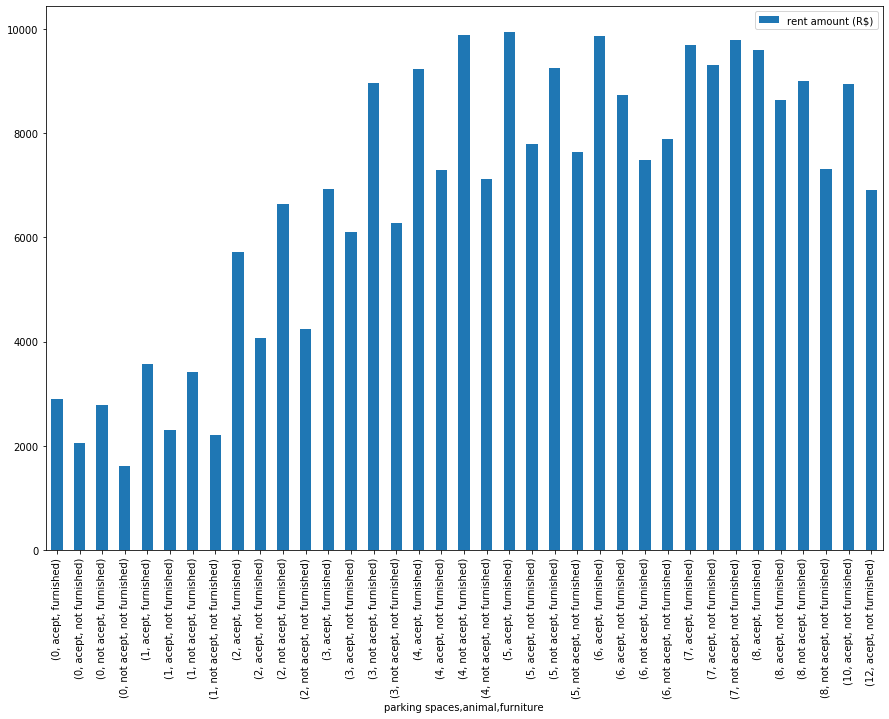

In [12]:
# Plotting the table

pivot_table1.plot(kind = 'bar', figsize = (15,10))

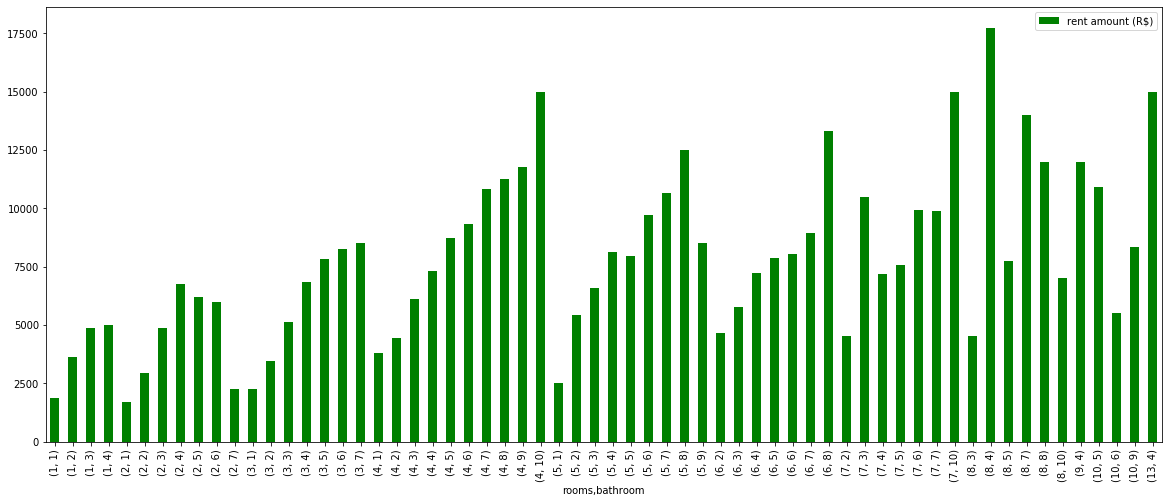

In [13]:
pivot_table2 = data.pivot_table(values = ['rent amount (R$)'], index = ['rooms','bathroom'])
pivot_table2.plot(kind = 'bar', color = 'green', figsize = (20,8))

In [14]:
'rooms','bathroom','parking spaces',

('rooms', 'bathroom', 'parking spaces')

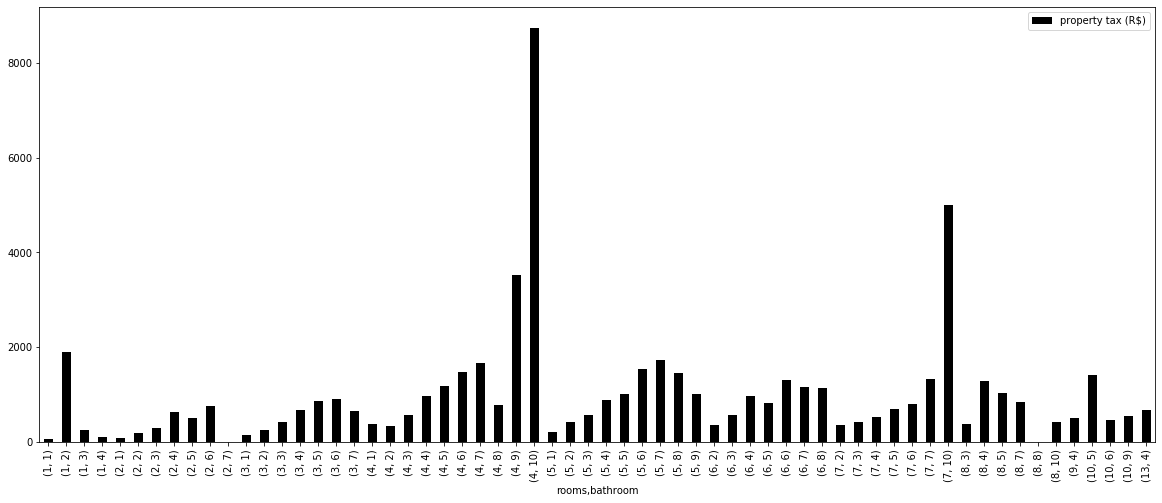

In [15]:
pivot_table3 = data.pivot_table(values = ['property tax (R$)'], index = ['rooms','bathroom'])
pivot_table3.plot(kind = 'bar', color = 'black', figsize = (20,8))

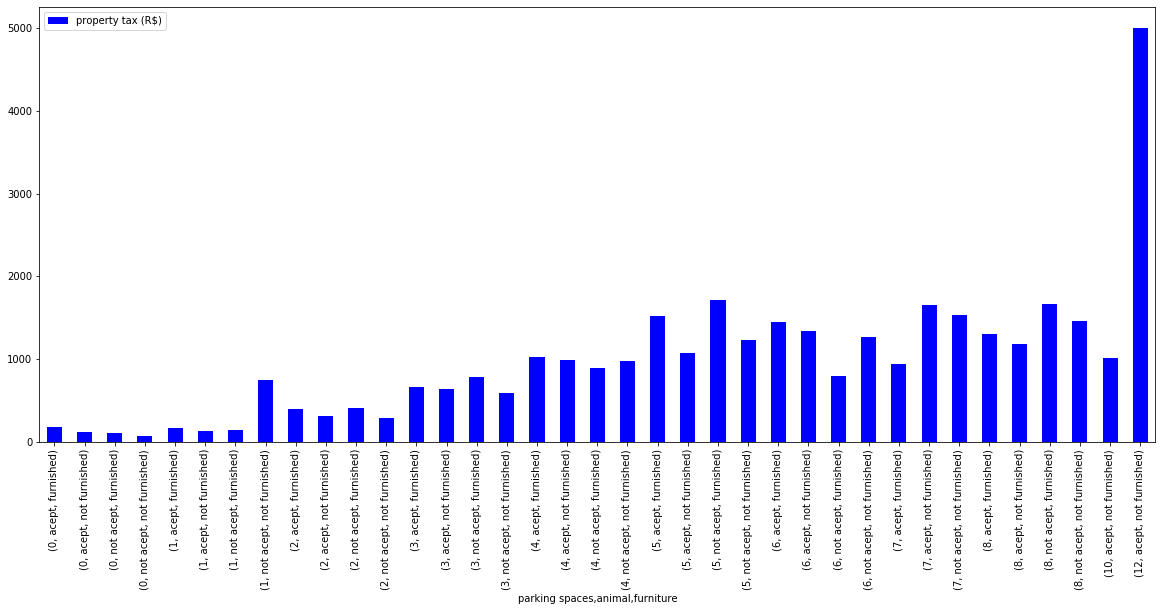

In [16]:
pivot_table3 = data.pivot_table(values = ['property tax (R$)'], index = ['parking spaces','animal','furniture'])
pivot_table3.plot(kind = 'bar', color = 'blue', figsize = (20,8))

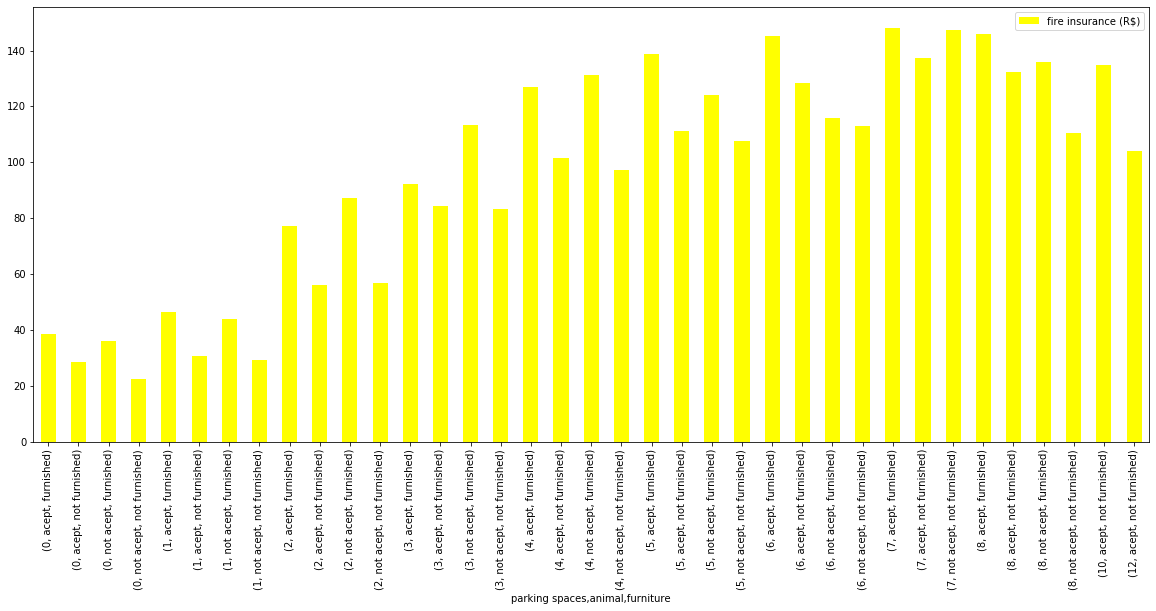

In [17]:
pivot_table3 = data.pivot_table(values = ['fire insurance (R$)'], index = ['parking spaces','animal','furniture'])
pivot_table3.plot(kind = 'bar', color = 'yellow', figsize = (20,8))

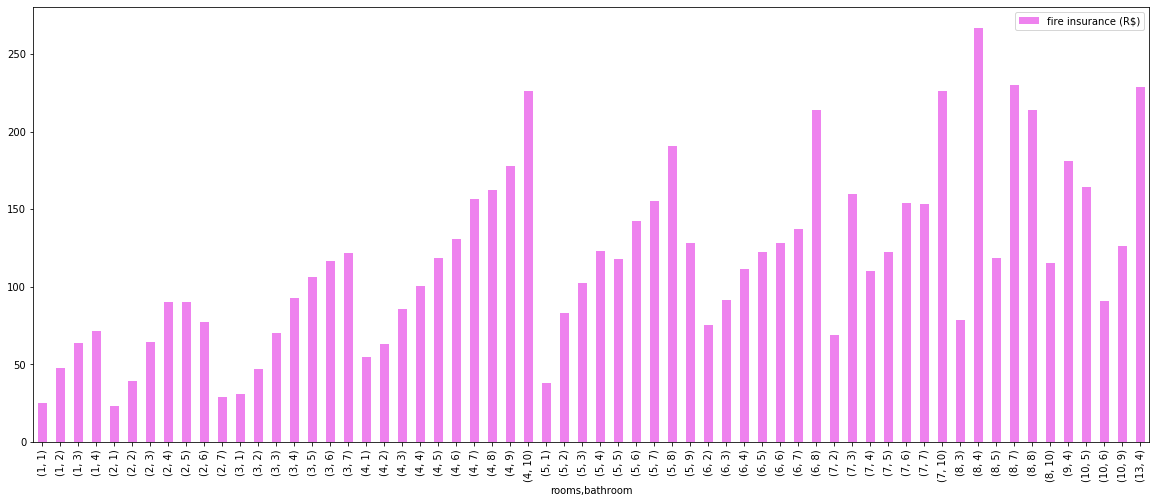

In [18]:
pivot_table3 = data.pivot_table(values = ['fire insurance (R$)'], index = ['rooms','bathroom'])
pivot_table3.plot(kind = 'bar', color = 'violet', figsize = (20,8))

In [19]:
data['city'].value_counts()

São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: city, dtype: int64

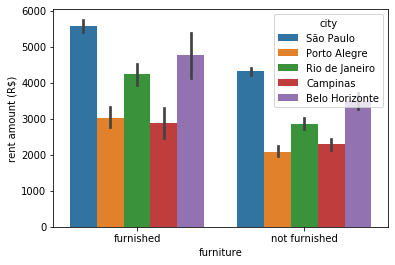

In [20]:
sns.barplot(x = 'furniture', y = 'rent amount (R$)', hue = 'city', data=data)

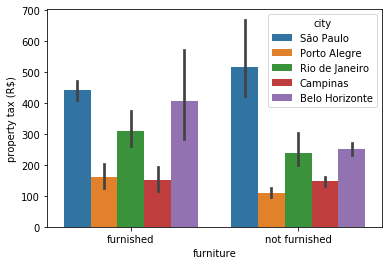

In [21]:
sns.barplot(x = 'furniture', y = 'property tax (R$)', hue = 'city', data=data)

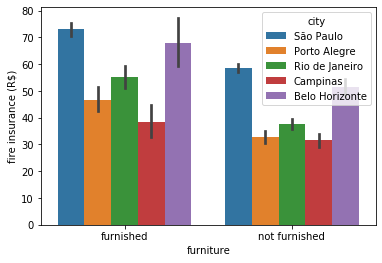

In [22]:
sns.barplot(x = 'furniture', y = 'fire insurance (R$)', hue = 'city', data=data)

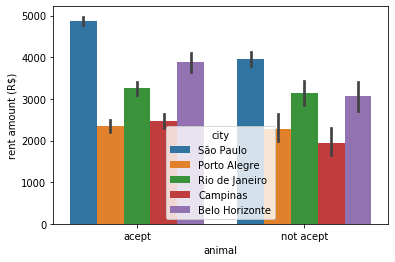

In [23]:
sns.barplot(x = 'animal', y = 'rent amount (R$)', hue = 'city', data=data)

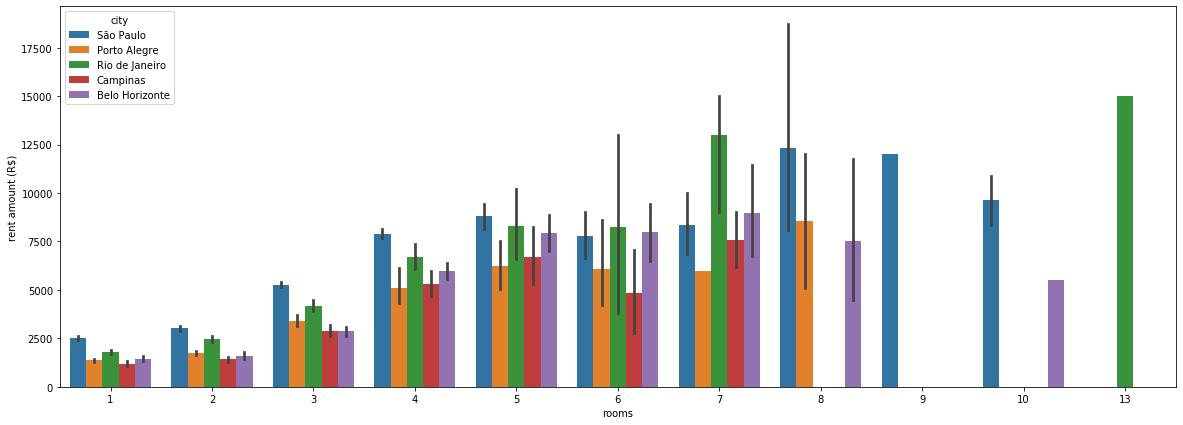

In [24]:
fig, ax = plt.subplots(figsize = (20,7))
sns.barplot(x = 'rooms', y = 'rent amount (R$)', hue = 'city', data=data, ax = ax)

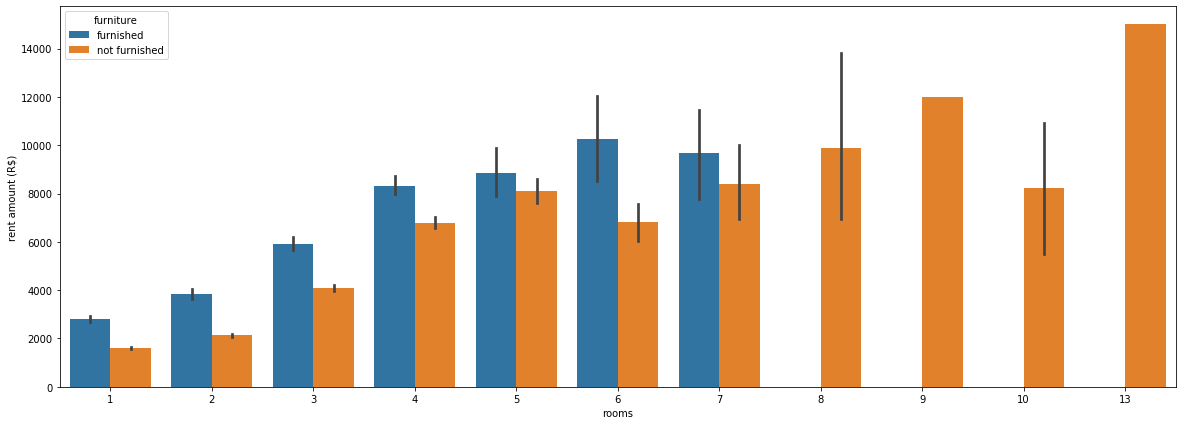

In [25]:
fig, ax = plt.subplots(figsize = (20,7))
sns.barplot(x = 'rooms', y = 'rent amount (R$)', hue = 'furniture', data=data, ax = ax)

(array([7.952e+03, 1.800e+03, 6.320e+02, 2.970e+02, 7.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  450.,  4905.,  9360., 13815., 18270., 22725., 27180., 31635.,
        36090., 40545., 45000.]),
 <a list of 10 Patch objects>)

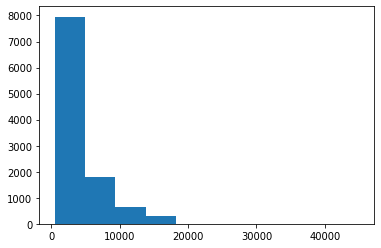

In [26]:
# Plotting histograms

plt.hist(data['rent amount (R$)'])

(array([8.191e+03, 1.686e+03, 6.720e+02, 1.370e+02, 3.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([  3. ,  70.4, 137.8, 205.2, 272.6, 340. , 407.4, 474.8, 542.2,
        609.6, 677. ]),
 <a list of 10 Patch objects>)

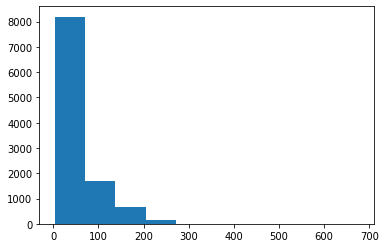

In [27]:
plt.hist(data['fire insurance (R$)'])

(array([1.0691e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([     0.,  31370.,  62740.,  94110., 125480., 156850., 188220.,
        219590., 250960., 282330., 313700.]),
 <a list of 10 Patch objects>)

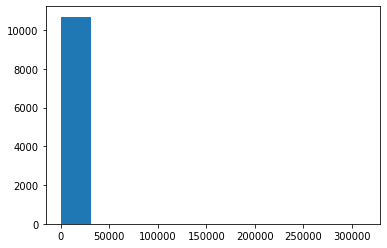

In [28]:
plt.hist(data['property tax (R$)'])

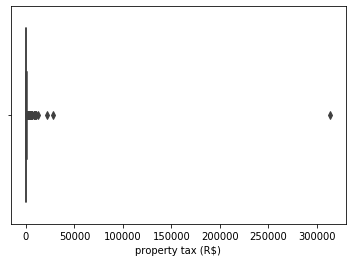

In [29]:
sns.boxplot(data['property tax (R$)'])


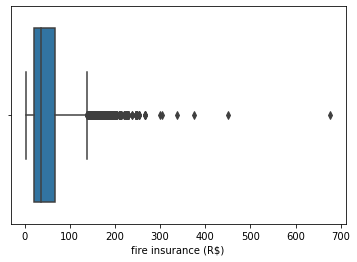

In [30]:
sns.boxplot(data['fire insurance (R$)'])


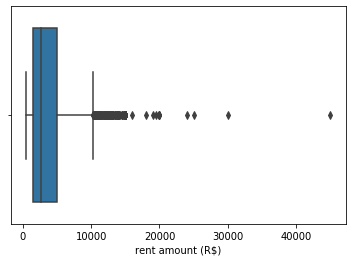

In [31]:
sns.boxplot(data['rent amount (R$)'])

# Observation

    * Box plot shows that in all three monetary columns, outliers are present which may tamper with prediction of the model

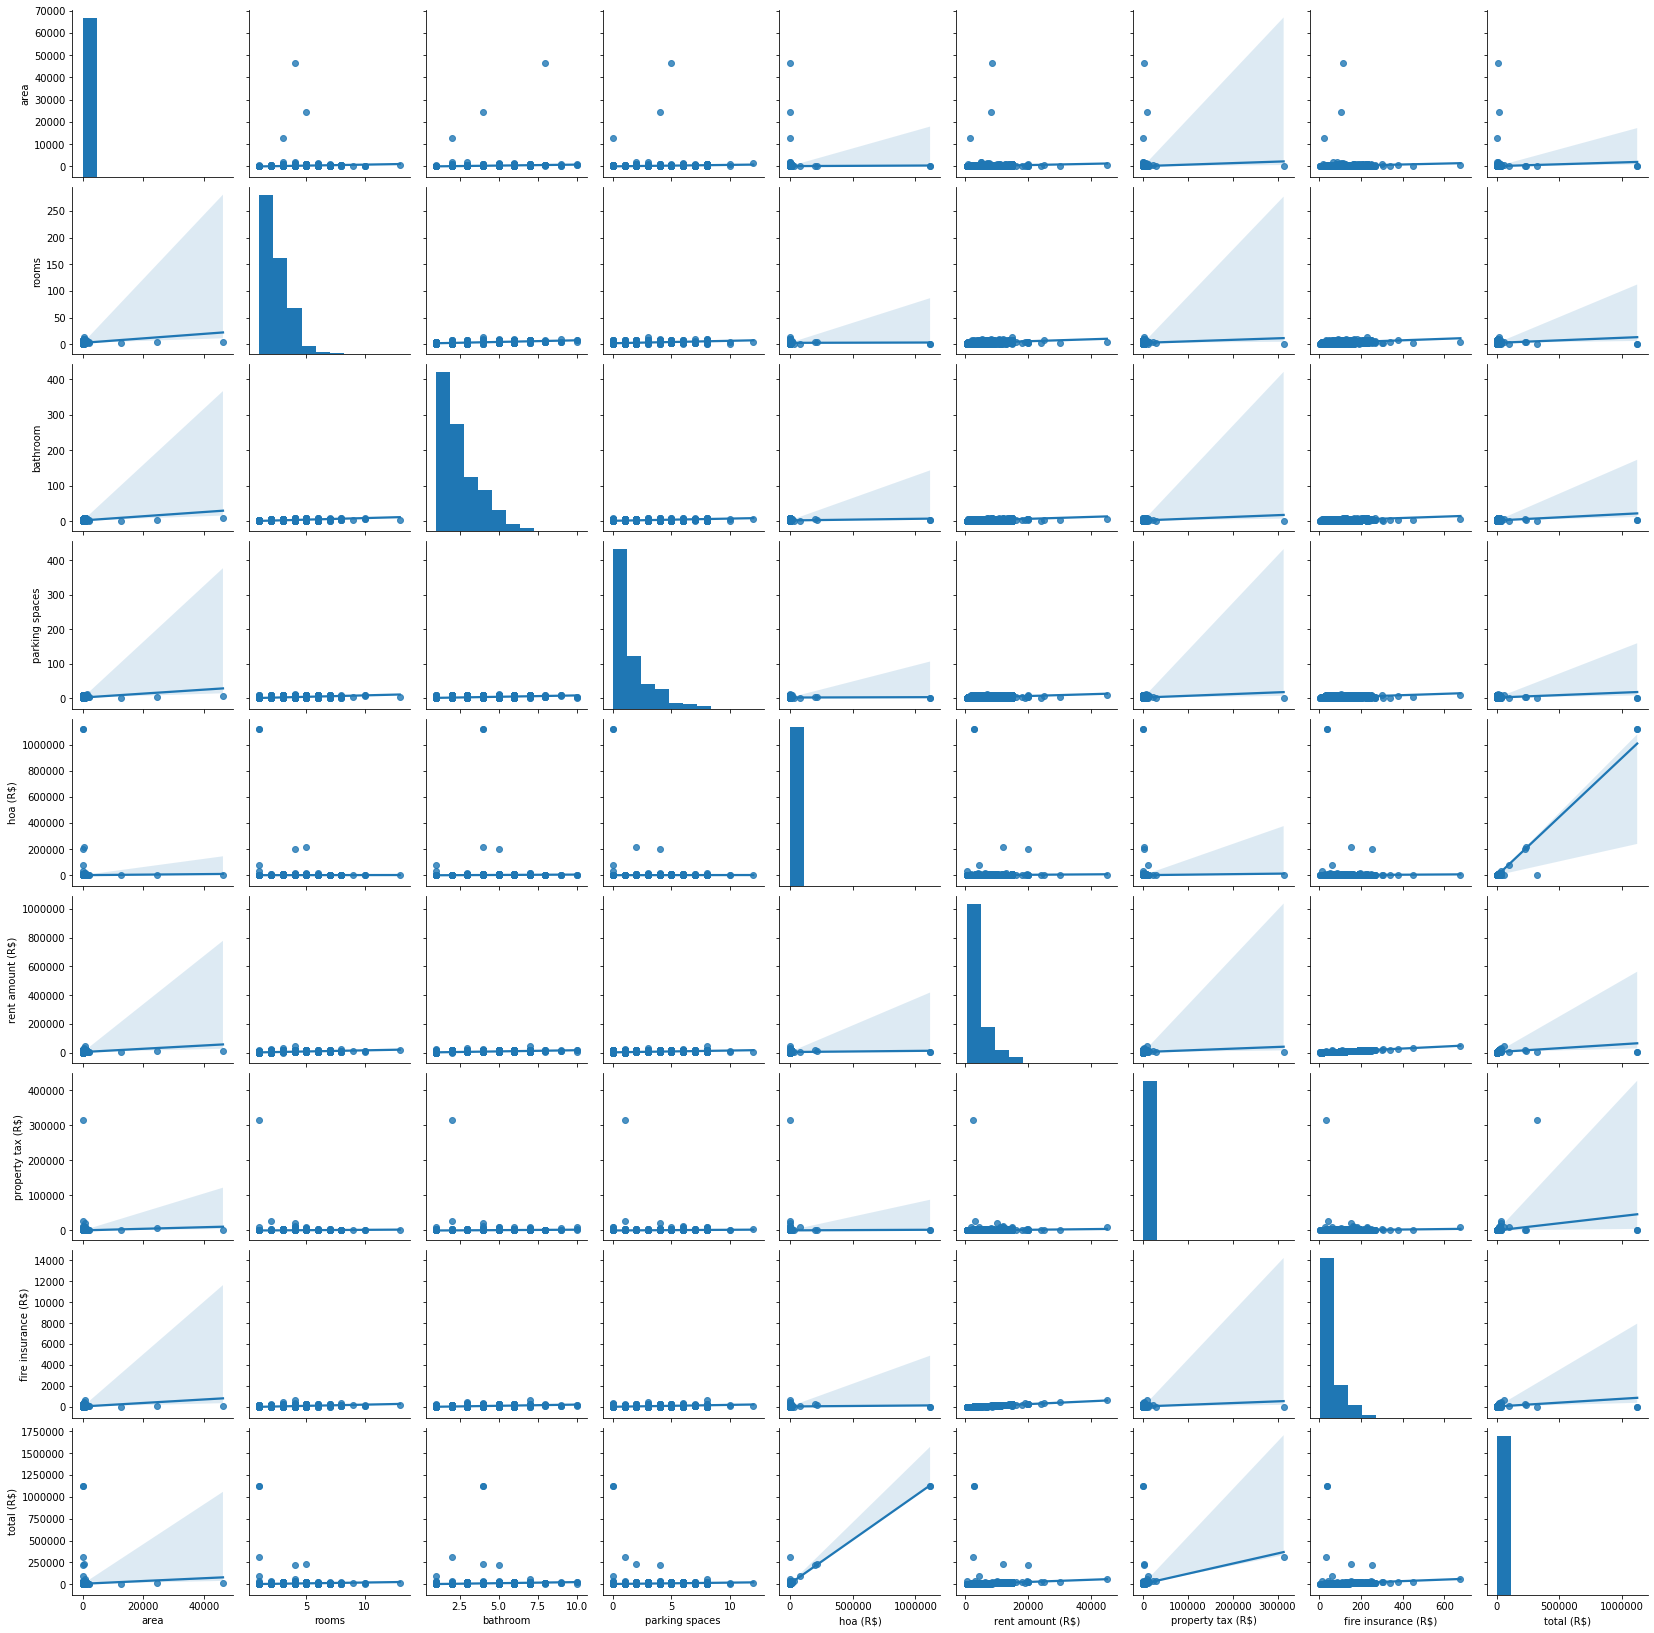

In [32]:
# Drawing pairplot

sns.pairplot(data, kind = 'reg')

# Making frequency table and plotting them


In [33]:
# Dataset 
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [34]:
freq_table1 = pd.crosstab(data['city'], data['animal'], data['rent amount (R$)'], margins = True, aggfunc = np.mean)
freq_table1

animal,acept,not acept,All
city,,,
Belo Horizonte,3874.740064,3064.495413,3664.127981
Campinas,2462.653680,1938.256250,2364.290739
Porto Alegre,2347.650746,2284.505319,2337.699916
Rio de Janeiro,3255.862241,3139.442568,3232.904064
São Paulo,4870.817046,3957.291815,4652.793783
All,4019.685786,3464.212121,3896.247194


In [35]:
freq_table2 = pd.crosstab(data['city'], data['rooms'], data['rent amount (R$)'], margins = True, aggfunc = np.mean)
freq_table2

rooms,1,2,3,4,5,6,7,8,9,10,13,All
city,,,,,,,,,,,,
Belo Horizonte,1438.666667,1610.625874,2856.565553,5968.640379,7925.384615,7975.550000,8967.692308,7500.000000,NaN,5500.000000,NaN,3664.127981
Campinas,1196.825688,1416.229249,2900.431734,5307.186813,6711.071429,4850.000000,7600.000000,NaN,NaN,NaN,NaN,2364.290739
Porto Alegre,1357.516043,1718.405660,3413.381271,5120.419355,6208.818182,6088.888889,6000.000000,8550.000000,NaN,NaN,NaN,2337.699916
Rio de Janeiro,1785.844059,2446.699234,4191.507109,6697.085938,8282.666667,8266.666667,13000.000000,NaN,NaN,NaN,15000.0,3232.904064
São Paulo,2500.348624,3020.322819,5278.566737,7893.111336,8792.487179,7787.625000,8374.705882,12300.000000,12000.0,9615.000000,NaN,4652.793783
All,2027.854931,2462.187227,4482.279596,7155.170240,8227.239583,7466.397059,8865.277778,9872.727273,12000.0,8243.333333,15000.0,3896.247194


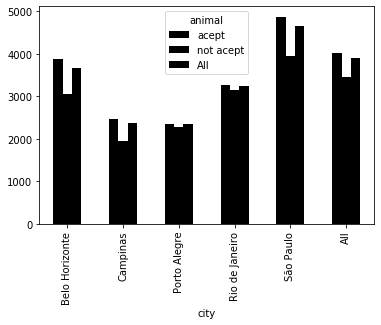

In [36]:
freq_table1.plot(kind = 'bar', color = 'black')

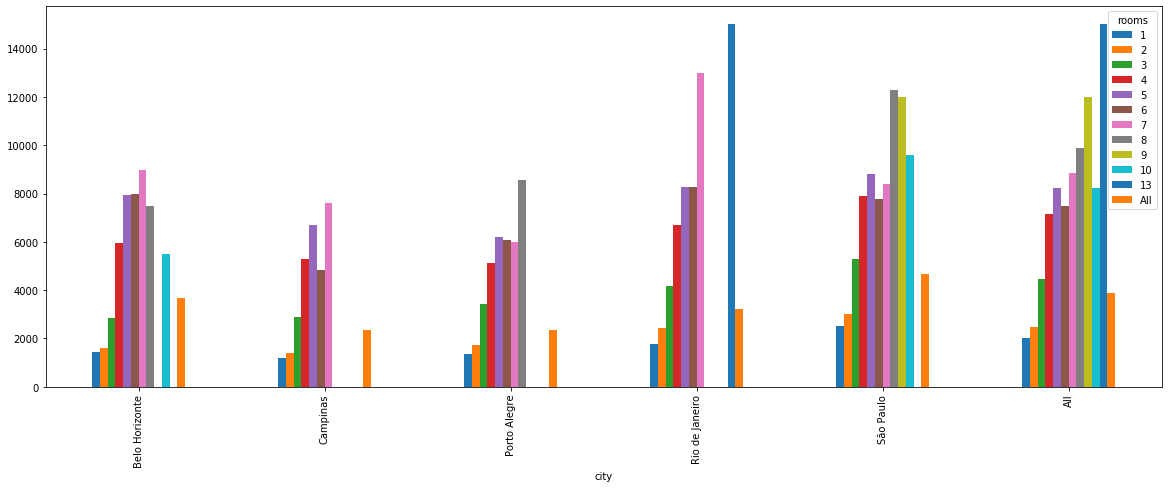

In [37]:
fig, ax = plt.subplots(figsize = (20,7))
freq_table2.plot(kind = 'bar', ax = ax)

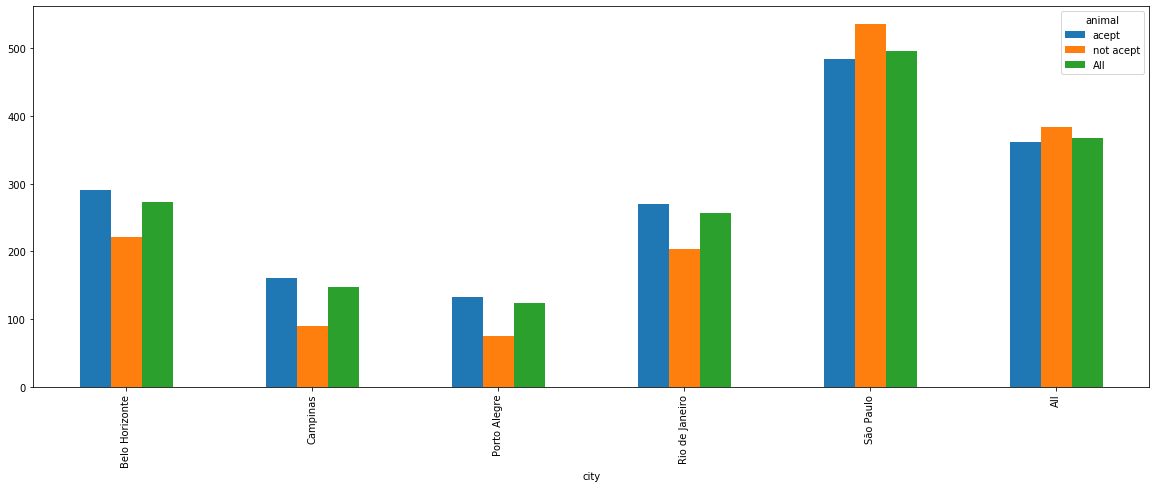

In [38]:
freq_table3 = pd.crosstab(data['city'], data['animal'], data['property tax (R$)'], margins = True, aggfunc = np.mean)
fig, ax = plt.subplots(figsize = (20,7))
freq_table3.plot(kind = 'bar', ax = ax)

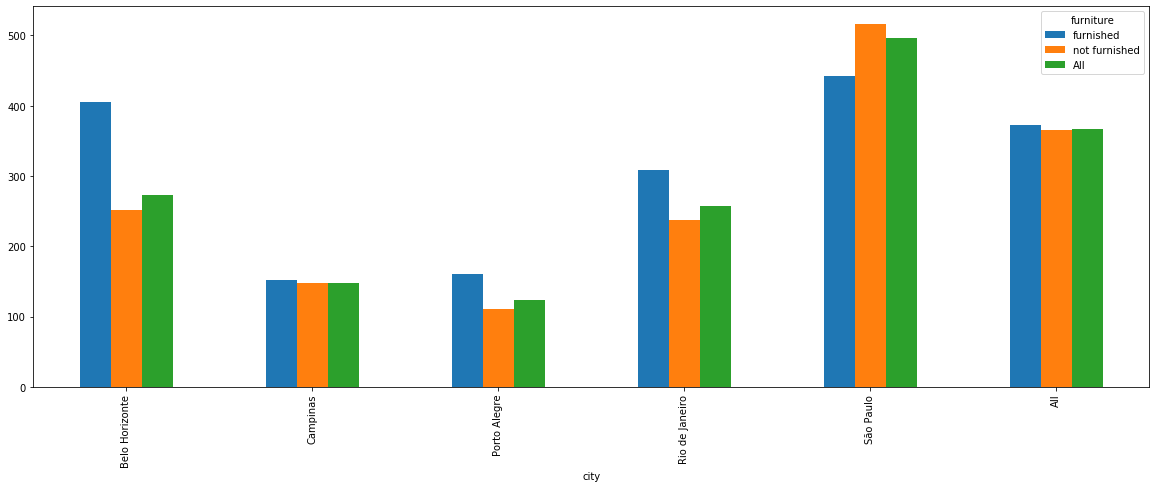

In [39]:
freq_table4 = pd.crosstab(data['city'], data['furniture'], data['property tax (R$)'], margins = True, aggfunc = np.mean)
fig, ax = plt.subplots(figsize = (20,7))
freq_table4.plot(kind = 'bar', ax = ax)

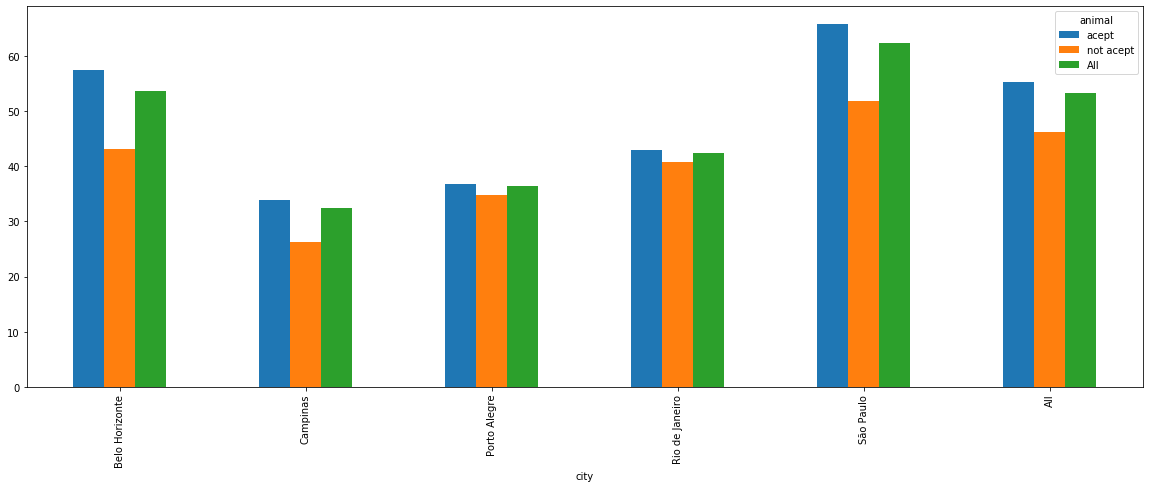

In [40]:
freq_table5 = pd.crosstab(data['city'], data['animal'], data['fire insurance (R$)'], margins = True, aggfunc = np.mean)
fig, ax = plt.subplots(figsize = (20,7))
freq_table5.plot(kind = 'bar', ax = ax)

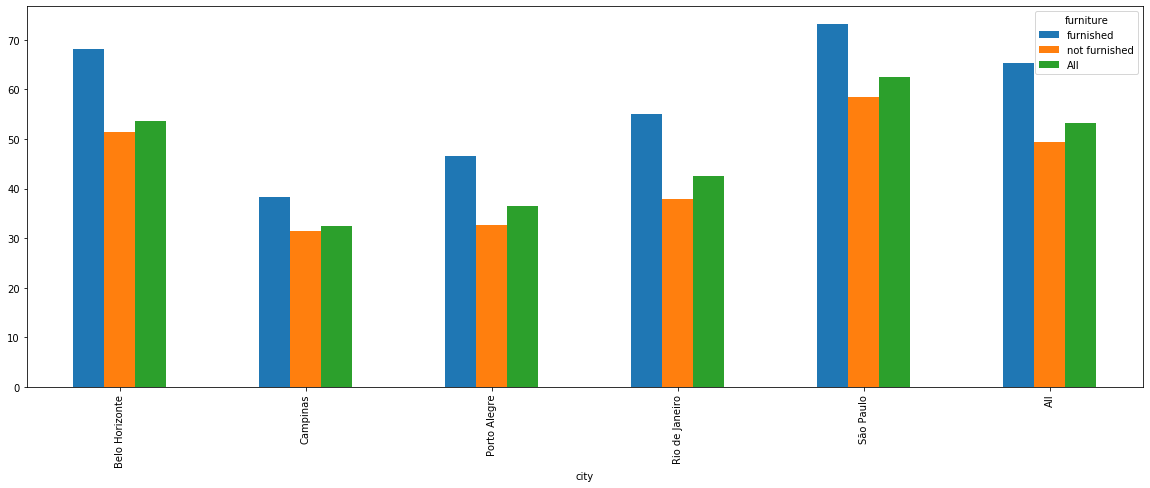

In [41]:
freq_table6 = pd.crosstab(data['city'], data['furniture'], data['fire insurance (R$)'], margins = True, aggfunc = np.mean)
fig, ax = plt.subplots(figsize = (20,7))
freq_table6.plot(kind = 'bar', ax = ax)

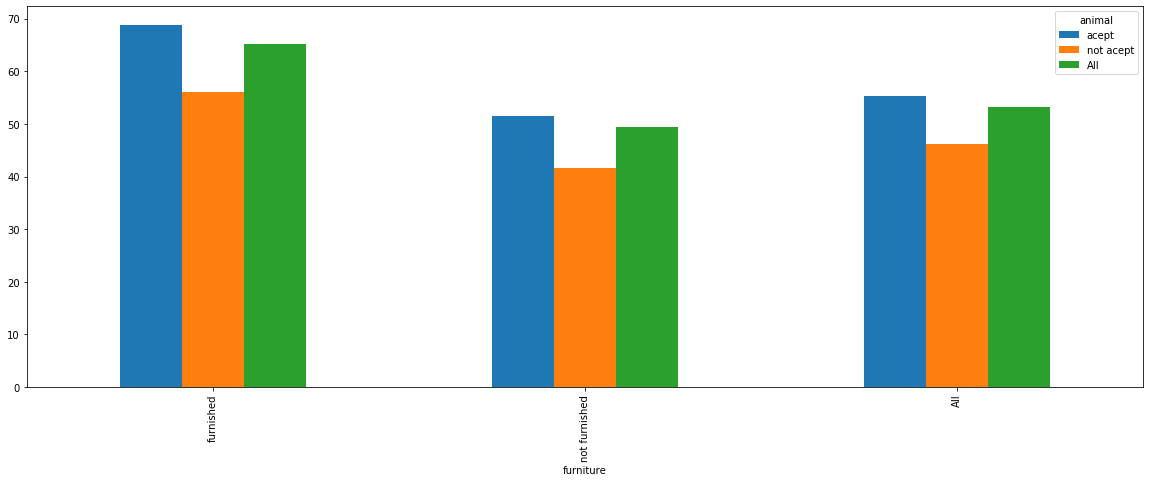

In [42]:
freq_table7 = pd.crosstab(data['furniture'], data['animal'], data['fire insurance (R$)'], margins = True, aggfunc = np.mean)
fig, ax = plt.subplots(figsize = (20,7))
freq_table7.plot(kind = 'bar', ax = ax)

# Sorting Pandas DataFrames

In [43]:
# Syntax = df.sort_values([columns to be sorted], ascending = )[Columns to be displayed]

sort1= data.sort_values(['fire insurance (R$)'], ascending = False)[['animal', 'furniture']]
sort1

,animal,furniture
2182,acept,not furnished
7748,acept,not furnished
6947,acept,not furnished
2521,acept,not furnished
2619,acept,not furnished
...,...,...
3776,acept,not furnished
8104,not acept,not furnished
6376,acept,not furnished
8096,acept,not furnished


In [44]:
#Another way of writing above command

sort2 = data.sort_values(['rent amount (R$)'], ascending = False)
sort2[['animal', 'furniture']].head(10)

,animal,furniture
2182,acept,not furnished
7748,acept,not furnished
6947,acept,not furnished
2619,acept,not furnished
1743,acept,not furnished
2859,acept,furnished
1253,not acept,not furnished
5525,acept,not furnished
157,acept,furnished
6185,acept,not furnished


# Plotting Combined Box Plot 

C:\Users\pushp\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


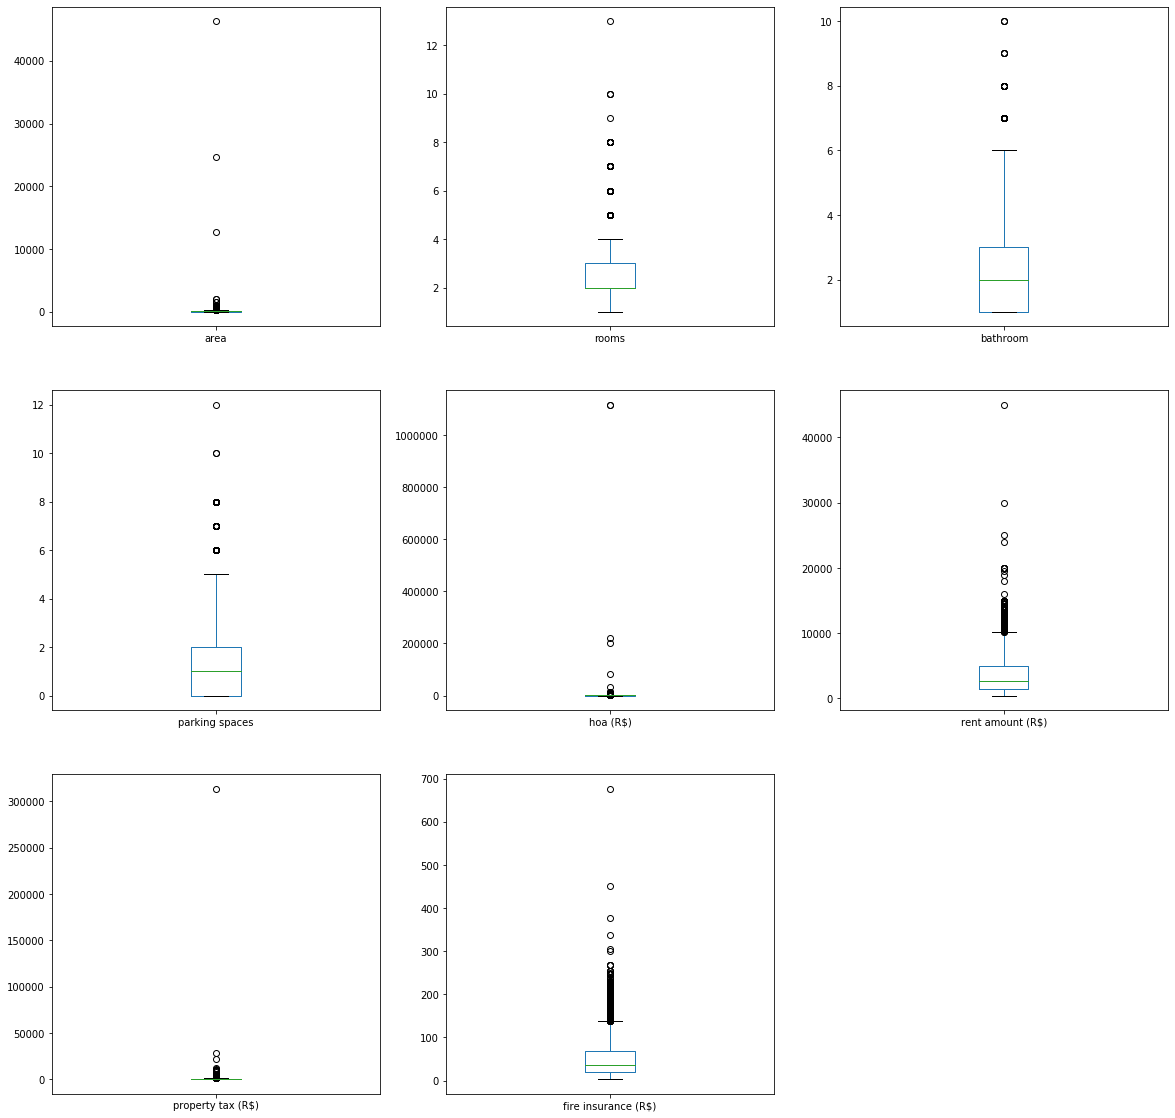

In [45]:
import numpy as np
col_int = list(data.select_dtypes(include = np.number))
int_df = data[col_int]
int_df.drop('total (R$)', axis = 1, inplace = True)

# making boxplot 
int_df.plot(kind = 'box', subplots = True, layout = (3,3), sharex = False, sharey = False, figsize = (20,20))
plt.show()


In [46]:
# Making boxplots of standardized data

X.plot(kind = 'box', subplots = True, layout = (4,2), sharex = False, sharey = False, figsize = (20,25))
plt.show()


NameError: name 'X' is not defined

In [ ]:
data.boxplot(column = 'rent amount (R$)', by = 'rooms', fontsize = 10, figsize = (20,8))

In [ ]:
data.boxplot(column = 'fire insurance (R$)', by = 'rooms', figsize = (20,8))

In [ ]:
data.boxplot(column = 'property tax (R$)', by = 'rooms', figsize = (20,8))

Observation::
     
     * Outliers lie in all three rent columns. 
     * Hence outliers must be standarzized before feeding the data into the model. 
     * Using MinMaxScaler and StandardScaler to treat the outliers

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

mms = MinMaxScaler()             # mms = minmaxscaler
sc = StandardScaler()            # sc = StandardScaler


In [ ]:
# Defining our predictor and target variable

X = data.drop(['total (R$)'], axis = 1)    #Predictor Variable
Y = data['total (R$)']                    #Target Variable

* First performing MinMax on the dataset

In [ ]:
# Separting integer columns and saving them as a list

col_int_type = list(X.select_dtypes(include = 'int64')) 
int_df = X[col_int_type]
int_df

In [ ]:
# Performing MinMax on integer values columns

X[col_int_type] = mms.fit_transform(X[col_int_type])
print('Data after normalization using Minmax Scaler :: \n\n', X)

In [ ]:
# Performing StandardScaler on integer values columns

X[col_int_type] = sc.fit_transform(X[col_int_type])
print('Data after standardization using Standard Scaler :: \n\n', X)

In [ ]:
Y

In [ ]:
# Performing standardization and MinMaxScaler on target variable

normalized_target = (mms.fit_transform(data[['total (R$)']]))   # gives an array of values
normalized_target = pd.DataFrame(normalized_target)            # changing array into a dataframe
Y = sc.fit_transform(normalized_target)

print('Data after standardization using MinMaxScaler and Standard Scaler :: \n\n', Y)

In [ ]:
# Plotting the box plot to see the changes outlier treatment

X.boxplot(column = 'rent amount (R$)', by = 'furniture', fontsize = 10, figsize = (20,8))

# Outlier treatment ::

In [ ]:
q_low = X[col_int_type].quantile(0.01)
q_hi  = X[col_int_type].quantile(0.99)
final_X = X[(X[col_int_type] < q_hi) & (X[col_int_type] > q_low)]
final_X.boxplot(column = 'rent amount (R$)', by = 'rooms', fontsize = 10, figsize = (20,8))

* Outliers have been removed and box plot shows consederable difference

In [ ]:
#Getting the stats of the predictor features

X.describe()

In [ ]:
# Converting categorial variable into binary values using dummies function

col_object_type = list(X.select_dtypes(include = 'object'))
df_object = X[col_object_type]
dummies_df = pd.get_dummies(df_object)
dummies_df

In [ ]:
X

In [ ]:
# Removing categorial data from data set and then concatenating 

temp_df = X.drop(col_object_type, axis = 1)
final_X = pd.concat([temp_df, dummies_df], axis = 1)
final_X

# Machine Learning Modelling

* Performing on raw data without scaling

In [ ]:
# SPlitting the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(final_X, Y, random_state = 121, test_size = 0.25)

x_train.shape, x_test.shape

In [ ]:
# Performing modelling over data with outliers first

from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=100, max_depth=2, min_samples_leaf=3)
model.fit(x_train, y_train)

In [ ]:
pred_val = model.predict(x_test)
pred_val

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def score(test, predicted):
    
    rmse_score = np.sqrt(mean_squared_error(test, predicted))
    print('Root Mean Square Error of the model is :: ', rmse_score)

    rmas_score = np.sqrt(mean_absolute_error(test, predicted))
    print('\nRoot Mean Absolute Error of the model is :: ', rmas_score)

    r_score = r2_score(test, predicted)
    print('\nR-Squared value of the model is :: ', r_score)



In [ ]:
score(y_test, pred_val)

In [ ]:
# Changing parameters and checking how they effect on the score

model2 = DecisionTreeRegressor(random_state=12, max_depth=2, min_samples_leaf=10)
model2.fit(x_train, y_train)

pred = model2.predict(x_test)
score(y_test, pred)

In [ ]:
# Changing parameters and checking how they effect on the score

model3 = DecisionTreeRegressor(random_state=12, max_depth=3, min_samples_leaf=5)
model3.fit(x_train, y_train)

pred = model3.predict(x_test)
score(y_test, pred)

In [ ]:
# Using unstandardized data in the model and checking the score

new_model = DecisionTreeRegressor(random_state=1)
new_model.fit(final_X,Y)
pred = new_model.predict(final_X)
score(Y, pred)

# Observation:: 
      
   * R-Sqaured error is nearly 1 hence it shows that our model is overfitted

# Using Random Forest ::